# Voting classifier

In [8]:
from cardio_datasets import cardio_100_samples, reduced_dataset
from model_selection_and_evaluation_functions import show_classification_evaluation_metrics, create_X_y_from_data_frame
from sklearn.ensemble import VotingClassifier
import joblib

In [29]:
KNeighborsClassifier_pipeline = joblib.load('./models/pipeline/KNeighborsClassifier_pipeline.joblib')
LinearSVC_pipeline = joblib.load('./models/pipeline/LinearSVC_pipeline.joblib')
LogisticRegression_pipeline = joblib.load('./models/pipeline/LogisticRegression_pipeline.joblib')
KNeighborsClassifier_model = joblib.load('./models/evaluation/KNeighborsClassifier_model_4.joblib')
LinearSVC_model = joblib.load('./models/evaluation/LinearSVC_model_2.joblib')
LogisticRegression_model = joblib.load('./models/evaluation/LogisticRegression_model_4.joblib')

In [10]:
X, y = create_X_y_from_data_frame(reduced_dataset, 'cardio')

In [11]:
VotingClassifier_1 = VotingClassifier(
    [
        ("KNeighborsClassifier", KNeighborsClassifier_pipeline),
        ("LinearSVC", LinearSVC_pipeline),
        ("LogisticRegression", LogisticRegression_pipeline),
    ]
)
VotingClassifier_1.fit(X, y)

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(leaf_size=2)),
                             ('LinearSVC',
                              Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                                              ('LinearSVC',
                                               LinearSVC(C=0.01,
                                                         max_iter=100000))])),
                             ('LogisticRegression',
                              Pipeline(steps=[('PolynomialFeatures',
                                               PolynomialFeatures(degree=6)),
                                              ('MinMaxScaler', MinMaxScaler()),
                                              ('LogisticRegression',
                                               LogisticRegression(l1_ratio=0.22,
                                                                  max_iter=10000,
                                          

In [25]:
Sample_X, Sample_y = create_X_y_from_data_frame(cardio_100_samples[reduced_dataset.columns], 'cardio')

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        47
           1       0.76      0.70      0.73        53

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



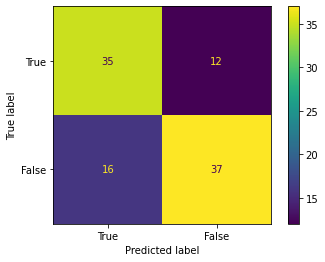

In [26]:
show_classification_evaluation_metrics(VotingClassifier_1, Sample_X, Sample_y)

In [30]:
KNeighborsClassifier_model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('KNeighborsClassifier',
                                        KNeighborsClassifier())]),
             param_grid={'KNeighborsClassifier__leaf_size': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14],
                         'KNeighborsClassifier__weights': ['uniform']},
             scoring='recall')

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        47
           1       0.71      0.68      0.69        53

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



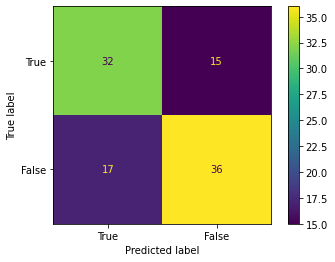

In [31]:
show_classification_evaluation_metrics(KNeighborsClassifier_model, Sample_X, Sample_y)